# Definicion
Sea una matrix $X$ que contiene una cantidad de instancias de datos de tamaño $n$ y tiene $m$ caracteristicas entonces:

$\chi = \begin{equation}\begin{bmatrix} x^{1}_{1} & x^{1}_{2} & . & . & . & x^{1}_{n} \\ x^{2}_{1} & x^{2}_{2} & . & . & . & x^{2}_{n} \\ . & . & . & & & . \\ . & . &  & . & & . \\ . & . & & & . & . \\x^{m}_{1} & x^{m}_{2} & . & . & . & x^{m}_{n}   \\\end{bmatrix}\end{equation}$

Esta matriz de datos es la que se usara para poder encontrar las $\theta$'s que mejor se ajusta a los datos.

Como el metodo del descenso del gradiente es un metodo de aprendizaje supervisado entonces necesitamos las etiquetas dadas por un vector $Y$ de tamaño $1xm$:

$Y = \begin{equation}\begin{bmatrix} y_{1} \\ y_{2}  \\ . \\ . \\ . \\y_{m} \\\end{bmatrix}\end{equation}$

Para poder hacer la predicción necesitamos una recta hipótesis la cual tengo un error mínimo es decir, que la distancia del punto donde se ubica la etiqueta, sea la menor, la manera de encontrar esta recta es usando una funcion de costo. 

La función de costo nos ayudara a minimizar los valores que tenemos que asignar a $b$ y $m$ la ordenada al origen y la pendiente respectivamente. Por lo cual tenemos que definir la siguiente matriz de $\theta ' s$:


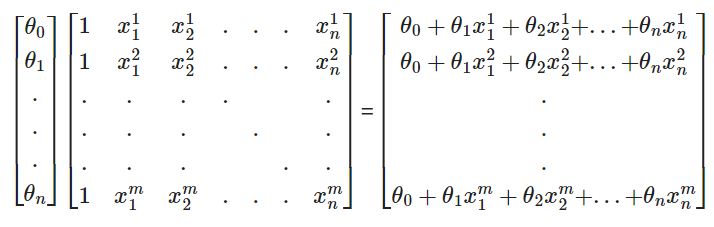


Por conveniencia $x_{0}^{m} = 1$ 

Donde el producto del vector de los valores de puede tomar $\theta$ (vector columna) multiplica a cada uno de los renglones de la matriz de características. Una vez realizado el producto obtenemos una recta hipótesis.

Donde $h$ :

$h(x) = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2} + . . . + \theta_{n}x_{n}$

Con el producto anterior podemos obtener diferentes rectas a partir de los valores que le asignemos a las $\theta$ 's.

De tal forma que podemos definir una sumatoria de la siguiente manera:

$J(\theta_{0}, \theta_{1}) = \frac{1}{2m}[(h(x^{1}) - y^{1})^{2} + (h(x^{2}) - y^{2})^{2} + ... + (h(x^{i}) - y^{m})^{2}]$

Donde la funcion de costo esta definida por la siguiente funcion:

$J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\Sigma^{m}_{i=1}(h_{\theta}(x^{i}) - y^{i})^{2}$

Para encontrar el gradiente de esta funcion debemos derivar con respecto de nuestros parametros $\theta$ que reciba nuestra funcion, en este caso solo derivaremos con respecto de $\theta_{0}$ y $\theta_{1}$ donde estas representan la ordenada al origen y la pendiente de una recta:

$y(x) = mx + b$ $\Rightarrow$ $h(x) = \theta_{1}x + \theta_{0}$

Aplicando la regla de la cadena nos queda:

$J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\Sigma^{m}_{i=1}(h_{\theta}(x^{i}) - y^{i})^{2}$


$\LARGE{\frac{\partial J}{\partial \theta_{0}}} = \frac{1}{m} \Sigma^{m}_{i=1}(h_{\theta}(x^{i}) - y^{i})$

$\LARGE{\frac{\partial J}{\partial \theta_{1}}} = \frac{1}{m} \Sigma^{m}_{i=1}(h_{\theta}(x^{i}) - y^{i})x^{i}$


In [ ]:
import numpy as np # Para las operaciones de matrices
import matplotlib.pyplot as plt # Para graficar los datos y la recta con los valores mas optimizados
import pandas as pd # para obtener el objeto dataframe que retorna la lectura de una archivo csv o txt
from matplotlib.animation import FuncAnimation # Para la animacion del descenso del gradiente
%matplotlib inline

In [ ]:
# Definimos la lista donde almacenaremos los valores leidos del txt
list_values = []
# Definimos la ruta donde estara nuestro ARCHIVO
file_path = r'C:\Users\soulg\OneDrive\Desktop\AA\ex1data1.txt' 
# Abrir el archivo u hacer la lectura linea por linea
with open(file_path, 'r') as file:
    for line in file:
        list_values.append(line.rstrip().split(','))


         X        Y
0   6.1101   17.592
1   5.5277   9.1302
2   8.5186   13.662
3   7.0032   11.854
4   5.8598   6.8233
..     ...      ...
92  5.8707   7.2029
93  5.3054   1.9869
94  8.2934  0.14454
95  13.394   9.0551
96  5.4369  0.61705

[97 rows x 2 columns]


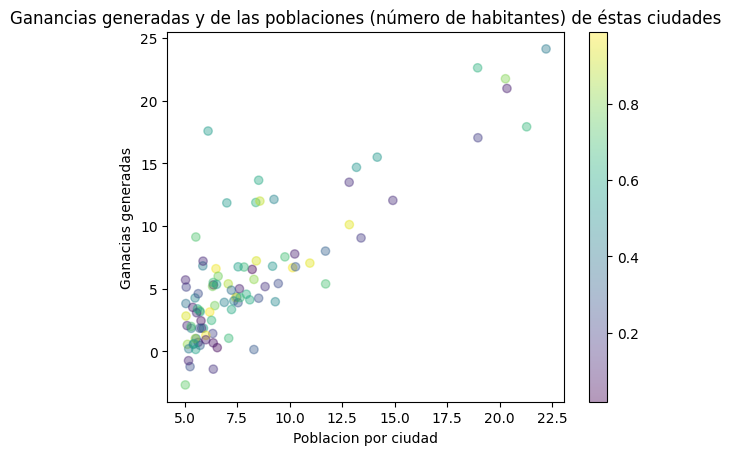

In [48]:
# Guardamos los datos leidos desde el txt en un objeto de tipo dataframe
df_list_products = pd.DataFrame(list_values, columns=['X', 'Y'])
# Obtener la columna X que contiene la cantidad de la poblacion
print(df_list_products)
x_i = df_list_products['X'].astype('float64')
# Obtener la columna y que contiene las ganancias generadas
y_i = df_list_products['Y'].astype('float64')
# Generacion de los colores para las grafica de puntos
rng = np.random.RandomState(0)
colors = rng.rand(97)
plt.scatter(x_i, y_i, c=colors, alpha=0.4, cmap='viridis')
plt.colorbar()
plt.title('Ganancias generadas y de las poblaciones (número de habitantes) de éstas ciudades')
plt.xlabel('Poblacion por ciudad')
plt.ylabel('Ganacias generadas')
plt.show()

In [ ]:
# Obtener la matriz de datos a partir del dataframe  
data_matrix = df_list_products.to_numpy().astype('float64')
#print(data_matrix)
# Tasa de aprendizaje
alpha = 0.02  
# Número de iteraciones
iterations = 1500  
# Obtenemos el vector x de datos
Xvector = data_matrix[:, :1]
# Obtenemos el vector y de etiquetas
Ytags = data_matrix[:, 1][:, np.newaxis]
# Añadimos una columna de unos a demanda_total para el termino de sesgo (interseccion)
X = np.hstack((np.ones((Xvector.shape[0], 1)), Xvector))
# Asignamos 
y = Ytags

# Inicialización de theta (pendiente e intersección)
theta = np.array([[25], [-12]])
#print("Vector Theta")

#print(theta)

In [44]:
theta_values = []

for i in range(iterations):
    # Calcular la predicción
    predictions = np.dot(X, theta)
    
    # Calcular el error
    error = predictions - y
    
    # Calcular el gradiente
    gradient = np.dot(X.T, error)
    
    # Actualizar theta
    theta = theta - (alpha / len(y)) * gradient
    #theta_values.append(theta)
    theta_values.append(theta.copy().reshape(-1, 1))

Parámetros optimizados (theta):
Intersección (theta0): -3.7630004360284426
Pendiente (theta1): 1.179694408516869


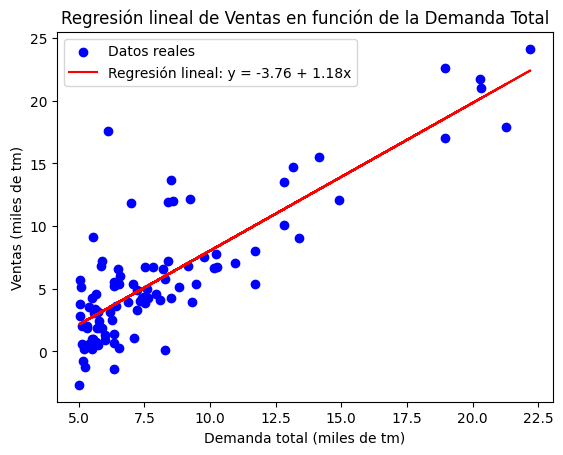

In [ ]:


# Imprimir los parámetros optimizados
print("Parámetros optimizados (theta):")
print("Intersección (theta0):", theta[0, 0])
print("Pendiente (theta1):", theta[1, 0])

# Generar predicciones usando los parámetros optimizados
y_pred = np.dot(X, theta)

# Graficar los puntos de datos y la línea de regresión
plt.scatter(Xvector, Ytags, color='blue', label='Datos reales')
plt.plot(Xvector, y_pred, color='red', label=f'Regresión lineal: y = {theta[0, 0]:.2f} + {theta[1, 0]:.2f}x')
plt.xlabel("Demanda total (miles de tm)")
plt.ylabel("Ventas (miles de tm)")
plt.title("Regresión lineal de Ventas en función de la Demanda Total")
plt.legend()
plt.show()

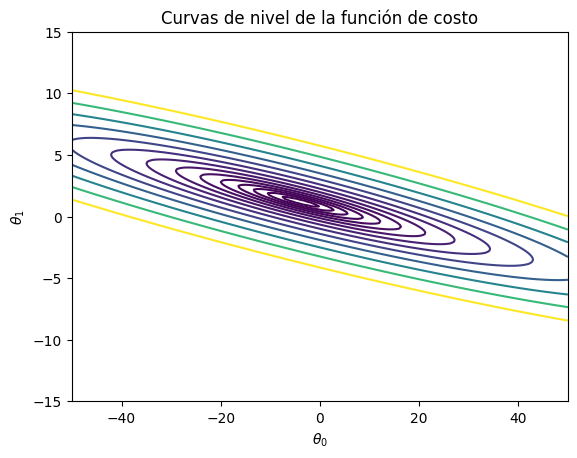

In [51]:

# Función de costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Generar datos para la visualización
theta0_vals = np.linspace(-50, 50, 200)
theta1_vals = np.linspace(-15, 15, 200)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros_like(T0)

for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        t = np.array([[T0[i, j]], [T1[i, j]]])
        J_vals[i, j] = compute_cost(X, y, t)

# Configurar la animación
fig, ax = plt.subplots()
contour = ax.contour(T0, T1, J_vals, levels=np.logspace(-2, 3, 30), cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Curvas de nivel de la función de costo')

# Inicializar el punto de gradiente descendente
point, = ax.plot([], [], 'ro', markersize=5)
line, = ax.plot([], [], 'r--')

def init():
    point.set_data([], [])
    line.set_data([], [])
    return point, line

def update(frame):
    t_vals = np.array(theta_values[:frame+1])  # Convertir a una matriz
    if t_vals.ndim == 2:  # Si solo tiene un valor (1D), ajusta
        t_vals = t_vals[:, np.newaxis]
    point.set_data(t_vals[-1, 0], t_vals[-1, 1])
    line.set_data(t_vals[:, 0], t_vals[:, 1])
    return point, line

frames = 200
interval = 50
ani = FuncAnimation(fig, update, frames=len(theta_values)*2, init_func=init, blit=True, interval=50)

# Mostrar la animación
plt.show()